In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Details of the Columns
Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount: Transaction amount

Class: 1 for fraudulent transactions, 0 otherwise (dependent variable)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null value is present.

In [5]:
df['Amount'].describe() #summary of the Amount.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
df.shape

(284807, 31)

Let's check if the data is balanced or imbalanced. the percentage of fraud.

In [7]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
fraud = (df['Class'].values ==1).sum()
fraud

492

In [10]:
non_fraud = (df['Class'].values ==0).sum()
non_fraud

284315

In [11]:
classes=df['Class'].value_counts()
genuine_percent=classes[0]/df['Class'].count()*100
fraud_percent=classes[1]/df['Class'].count()*100
print(genuine_percent)
print(fraud_percent)

99.82725143693798
0.1727485630620034


In [12]:
#percentage of fraud

#fraud_percent = (fraud*100)/(fraud+non_fraud)
#print("The percentage of fraud transactions is :", fraud_percent)

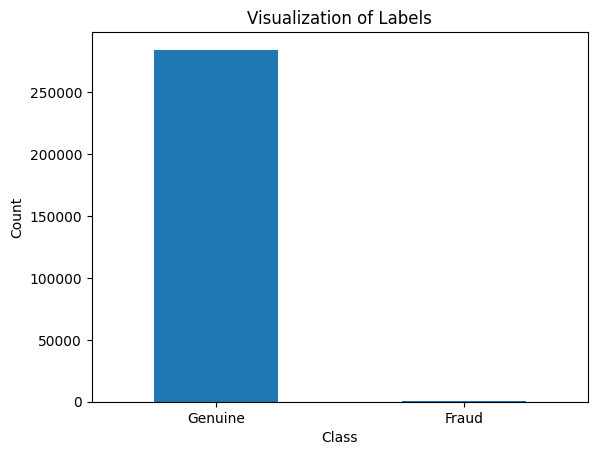

In [13]:
labels = ['Genuine','Fraud']
count = df.value_counts(df['Class'])
count.plot(kind = "bar",rot=0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

As we can see the number of fraudalent transactions are way too less that genuiene transactions. so we can say that it is an imbalanced dataset.

Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [14]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [16]:
df.drop(['Amount','Time'], inplace =True, axis=1)

In [17]:
y = df.Class
x = df.drop(['Class'],axis=1)

Splitting the data into training and test set. 80% training. 20% test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
print("The shape of x_train: ", x_train.shape)
print("The shape of x_test: ",x_test.shape)

The shape of x_train:  (227845, 29)
The shape of x_test:  (56962, 29)


Train and Evaluate our Models on the Dataset
Now, Let’s train and evaluate the newly created models on the dataset and pick the best one.

Train the decision tree and random forest models on the dataset using the fit() function. Record the predictions made by the models using the predict() function and evaluate.

Let’s visualize the scores of each of our credit card fraud classifiers.

In [20]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred1 = model_dt.predict(x_test)
model_dt_score = model_dt.score(x_test, y_test)*100

Confusion matrix -  Decision Tree

In [21]:
confusion_matrix_dt = confusion_matrix(y_test,y_pred1.round())
print("Confusion Matrix - Decision Tree: ")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree: 
[[56841    23]
 [   22    76]]


In [22]:
import sklearn

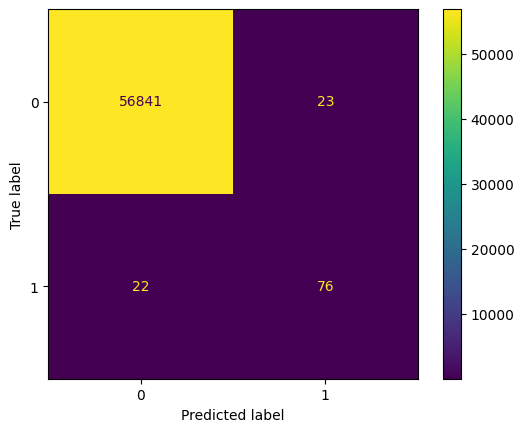

In [23]:
cm_dt = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=[0,1])
cm_dt.plot()
plt.show()

In [24]:
print("Decision Tree score: ", model_dt_score)

Decision Tree score:  99.92099996488886


In [25]:
print("Evaluation of Decision Tree model: ")
print("Accuracy score: ", accuracy_score(y_test, y_pred1))
print("f1 score: ",f1_score(y_test, y_pred1))
print("Recall: ", recall_score(y_test, y_pred1))
print("Precision score", precision_score(y_test, y_pred1))

Evaluation of Decision Tree model: 
Accuracy score:  0.9992099996488887
f1 score:  0.7715736040609136
Recall:  0.7755102040816326
Precision score 0.7676767676767676


In [26]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred2 = model_rf.predict(x_test)
model_rf_score = model_rf.score(x_test, y_test)*100
print("Random Forest score is: ", model_rf_score)

Random Forest score is:  99.96137776061234


In [27]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred2.round())
print("Confusion Matrix - Random Forest: ")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest: 
[[56863     1]
 [   21    77]]


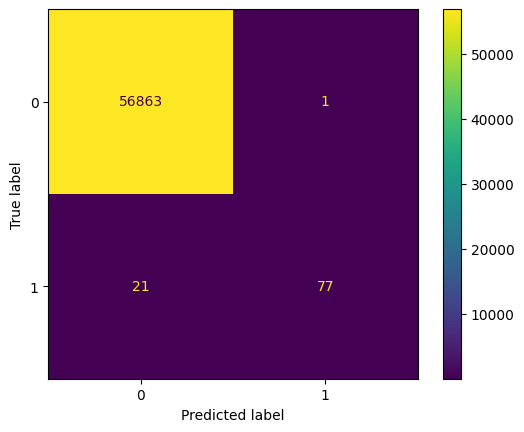

In [28]:
cm_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels=[0,1])
cm_rf.plot()
plt.show()

In [29]:
print("Evaluation of Random Forest model: ")
print("Accuracy score: ",accuracy_score(y_test,y_pred2))
print("F1 score: ", f1_score(y_test, y_pred2))
print("Recall score: ", recall_score(y_test,y_pred2))
print("Precision score: ", precision_score(y_test,y_pred2))

Evaluation of Random Forest model: 
Accuracy score:  0.9996137776061234
F1 score:  0.8750000000000001
Recall score:  0.7857142857142857
Precision score:  0.9871794871794872


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
y_pred3 = model_lg.predict(x_test)
model_lg_score = model_lg.score(x_test, y_test)*100
print("The Logistic Regression model score is: ", model_lg_score)

The Logistic Regression model score is:  99.91222218320986


Random Forest performs better among the three

# Address the Class-Imbalance issue
The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The legitimate transactions are more than 99% with the credit card fraud transactions constituting 0.17%.

With such a distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there is more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques, such as Undersampling and Oversampling.

Oversample the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique, or SMOTE, is a method of data augmentation for the minority class.

The above SMOTE is present in the imblearn package. Let’s import that and resample our data.

In the following code below, we resampled our data and we split it using train_test_split() with a split of 80-20.

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
x_resampled,y_resampled = SMOTE().fit_resample(x,y)
print("shape of resampled x: ", x_resampled.shape)
print("shape of resampled y: ", y_resampled.shape)

value_counts = Counter(y_resampled)
print(value_counts)

shape of resampled x:  (568630, 29)
shape of resampled y:  (568630,)
Counter({0: 284315, 1: 284315})


Splitting the dataset

In [35]:
x_re_train, x_re_test, y_re_train, y_re_test = train_test_split(x_resampled,y_resampled,random_state=42)

Random Forest performed the best so we will apply random forest to our resampled data

In [36]:
resampled_rf = RandomForestClassifier(n_estimators=100)
resampled_rf.fit(x_re_train, y_re_train)
y_re_pred = resampled_rf.predict(x_re_test)
prediction_resampled_score = resampled_rf.score(x_re_test,y_re_test)*100
print("Prediction score for resampled: ", prediction_resampled_score)

Prediction score for resampled:  99.98874491762687


In [37]:
confusion_matrix_rf_resampled = confusion_matrix(y_re_test,y_re_pred.round())
print("Confusion matrix of resampled data - random forest")
print(confusion_matrix_rf_resampled)

Confusion matrix of resampled data - random forest
[[71007    16]
 [    0 71135]]


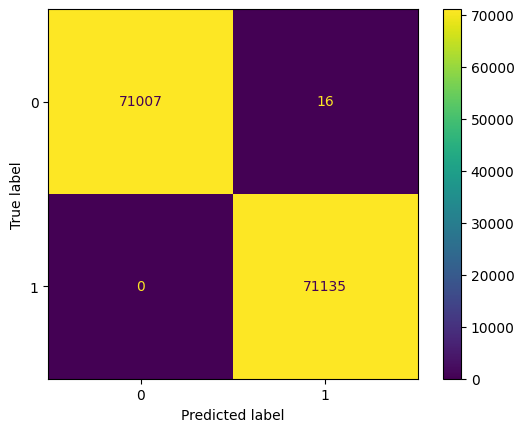

In [38]:
cm_resampled_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_resampled,display_labels=[0,1])
cm_resampled_rf.plot()
plt.show()

In [39]:
print("Evaluation of the random forest model with resampled data: ")
print("Accuracy score: ",accuracy_score(y_re_test,y_re_pred))
print("F1 score: ", f1_score(y_re_test,y_re_pred))
print("Recall score: ", recall_score(y_re_test,y_re_pred))
print("Precision score: ",precision_score(y_re_test,y_re_pred))

Evaluation of the random forest model with resampled data: 
Accuracy score:  0.9998874491762687
F1 score:  0.9998875504266056
Recall score:  1.0
Precision score:  0.9997751261401807


Our model has perfromed very well with smote. Recall score 1.

We will dump the model as pickel file

In [40]:
import pickle

In [41]:
pickle.dump(resampled_rf,open('model.pkl','wb'))